In [9]:
# from sklearn.svm import SVC
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# from matplotlib.colors import ListedColormap
# import matplotlib.pyplot as plt

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_checkerboard
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [4]:
# Set randomization seed
np.random.seed(0)
# Generate two features
features = np.random.randn(200, 2)
# Use a XOR gate (you don't need to know what this is) to generate
# linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Train the classifier
model = svc.fit(features, target)

In [6]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker="+", label=cl)

In [7]:
# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Train the classifier
model = svc.fit(features, target)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


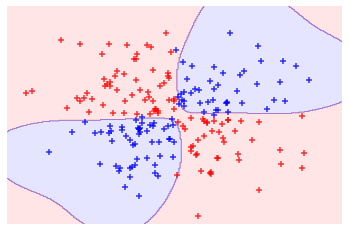

In [8]:
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show();

In [10]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [11]:
model = SVC(kernel='linear')
clf = model.fit(X, y)

In [12]:
clf

SVC(kernel='linear')

In [17]:
iris = pd.DataFrame(datasets.load_iris())
iris.head(3)

target_map = {'Iris-setosa':0, 
              'Iris-versicolor':1,
              'Iris-virginica':2 }
# Use the pandas apply method to numerically encode our attrition target variable
iris['Species'] = iris['Species'].apply(lambda x: target_map[x])

del X, y # remove the earlier X and y
X = iris.iloc[:, :2]  # Take only the first two features.
               
y = iris.Species
h = .02  # step size in the mesh

X = StandardScaler().fit_transform(X)


# Train two Random Forests. One with normal reasonable parameters and the other with overfitting
trees = RandomForestClassifier(max_depth=4, 
                               n_estimators=20, 
                               random_state=0)
trees.fit(X, y)

trees_overfit = RandomForestClassifier(max_depth=50, 
                                       n_estimators=5, 
                                       random_state=0)
trees_overfit.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Z = trees.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

fig = tools.make_subplots(rows=1, cols=2,
                          subplot_titles=("Random Forest (Depth = 4)",
                                          "Random Forest (Depth = 50)")
                         )

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=False)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
                  
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# transform grid using ExtraTreesClassifier
# y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = trees_overfit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, 
                            zeroline=False,
                            showticklabels=False, 
                            ticks='', 
                            autorange=True)
    fig['layout'][y].update(showgrid=False, 
                            zeroline=False,
                            showticklabels=False, 
                            ticks='', 
                            autorange=True)

py.iplot(fig)

ValueError: arrays must all be same length

In [ ]:
moon_fig = go.Figure()

trace1 = go.Heatmap(x = xx1[0], y = xx2, z = Z, colorscale = 'jet')

trace2 = go.Scatter(x = classification_data[0][:, 0], y = classification_data[0][:, 1],
mode = 'markers')
moon_fig.add_trace(trace1)
moon_fig.add_trace(trace2)

moon_fig.show()

In [ ]:
        # Plot s.vectors as circled points
        # mask = np.round(alphas, decimals=2) != 0.0
        # ax.scatter(X[mask,0], X[mask,1],
        #            c=y[mask], cmap=plt.cm.jet, lw=1, edgecolors='k')